## Perceptron Algorithm
In this tutorial, we discuss perceptron algorithm.

- A neuron accepts input signals via its dendrites, which pass the electrical signal down to the cell body.
- The Perceptron is a classification algorithm for problems with two classes (0 and 1) where a linear equation can be used to separate the two classes.
- The Perceptron receives input signals from examples of training data that we weight and combined in a linear equation called the activation.
  $$activation = \sum_i(w_i*x_i)+w_0$$
- The activation is then transformed into an output value or prediction using a transfer function, such as the step transfer function.
  $$ prediction = 1\ \text{if}\ activation >=0\ else\ 0$$
- Weight update rule:
  $$ w_{i+1} = w_i+\text{learning rate}*(expected_i-predicted_i)*x_i $$

In [ ]:
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i+1]*row[i]
    return 1.0 if activation >=0.0 else 0.0

In [ ]:
# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.206, -0.234]

for row in dataset:
    prediction = predict(row, weights)
    print(f"Expected = {row[-1]} , Predicted = {prediction} ")

Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 


In [ ]:
# estimate Perceptron weights using SGD

def training_weights(train, l_rate, n_epochs):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1]-prediction
            sum_error += error**2
            weights[0] = weights[0]+l_rate*error
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1]+l_rate*error*row[i]
        print(f"epoch ={epoch}, lrate = {l_rate: .3f}, error = {sum_error:.3f}")
    return weights

In [ ]:
weights = training_weights(dataset,l_rate=0.1, n_epochs=10)
print(weights)

epoch =0, lrate =  0.100, error = 2.000
epoch =1, lrate =  0.100, error = 1.000
epoch =2, lrate =  0.100, error = 0.000
epoch =3, lrate =  0.100, error = 0.000
epoch =4, lrate =  0.100, error = 0.000
epoch =5, lrate =  0.100, error = 0.000
epoch =6, lrate =  0.100, error = 0.000
epoch =7, lrate =  0.100, error = 0.000
epoch =8, lrate =  0.100, error = 0.000
epoch =9, lrate =  0.100, error = 0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


In [ ]:
for row in dataset:
    prediction = predict(row, weights)
    print(f"Expected = {row[-1]} , Predicted = {prediction} ")

Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 0 , Predicted = 0.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 
Expected = 1 , Predicted = 1.0 


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

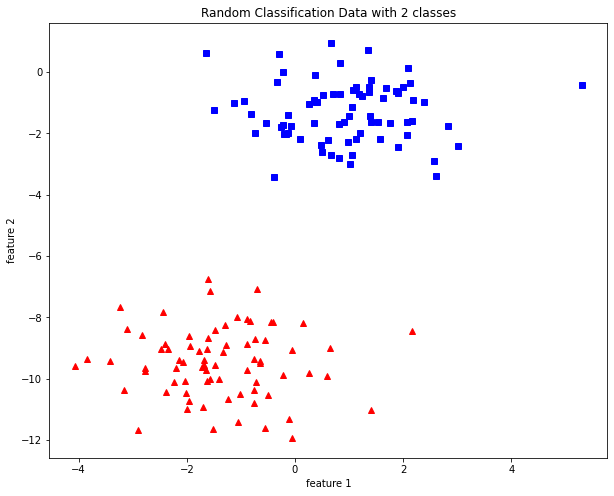

In [ ]:
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')
plt.show()

In [ ]:
import numpy as np

In [ ]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [ ]:
def perceptron(X,y, lr, n_epochs):
    #X-inputs
    #y-labels/target
    #lr-learning rate
    #n_epochs-Number of iterations
    m, n = X.shape
    #m-number of training examples
    #n-Number of features

    #initialization of parameters
    theta = np.zeros((n+1,1))

    #miss_classification list
    n_miss_list = []

    #training
    for epoch in range(n_epochs):
        # variable to store missclassified
        n_miss = 0

        # looping for every examples
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i,0,1).reshape(-1,1) #x0=1
            y_hat = step_func(np.dot(x_i.T,theta))
            #updating rule
            if (np.squeeze(y_hat)-y[idx]) != 0:
                theta += lr*((y[idx]-y_hat)*x_i)

                # Incrementing by 1
                n_miss += 1

        n_miss_list.append(n_miss)

    return theta, n_miss_list

In [ ]:
# plotting decision boundary
# theta.X = 0 is decision boundary

def plot_decision_boundary(X,theta):
    # X-Inputs
    #theta-parameters

    #The line y=mx+c
    # theta0.X0+theta1.X1+theta2.X2=0 is the decision boundary
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c

    # plotting the decision boundary
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')

    plt.plot(x1,x2,'y-')
    plt.show()


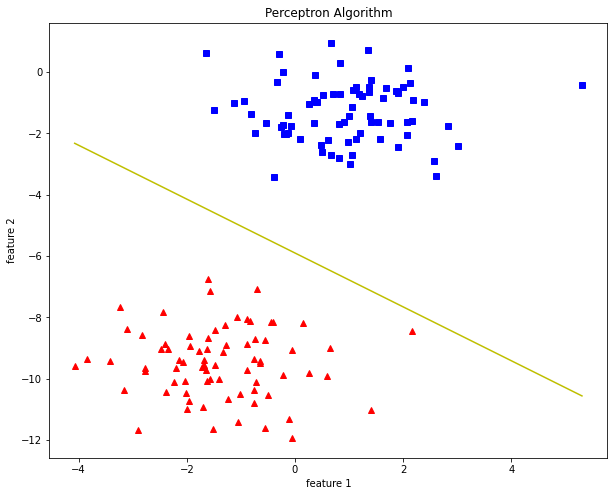

In [ ]:
theta, n_miss_list = perceptron(X,y,lr=0.01,n_epochs=50)
plot_decision_boundary(X,theta)